# Applied Data Science Capstone
This notebook will be mainly used for the capstone project. The project is the
following
## Moving to a similar neighborhood in Mexico City
Many people in Mexico City are moving to new houses every day, which is great  but a lot of people have problems 
getting familiarized with the new neighborhood because they miss their old neighborhood and the venues 
they used to go to . For example: they miss their favorite tacos or their favorite coffee shop.  
So, we can prevent people from spending many hours looking for a new neighborhood with the same kind of venues that 
they have nearby their old house. Instead, we can recommend neighborhoods with almost the same kind of venues as the 
old neighborhood.

### Import the libraries

In [2]:
print('Installing dependencies')
import sys
!conda install --yes --prefix {sys.prefix} numpy
!conda install --yes --prefix {sys.prefix} pandas
!conda install --yes --prefix {sys.prefix} requests
!conda install --yes --prefix {sys.prefix} -c conda-forge geopy
!conda install --yes --prefix {sys.prefix} -c conda-forge folium=0.5.0
!conda install --yes --prefix {sys.prefix} -c conda-forge scikit-learn

print('Dependencies installed')

Installing dependencies
Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /home/ivan/anaconda3/envs/Coursera_Capstone

  added / updated specs:
    - numpy


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2020.4.5~ --> pkgs/main::ca-certificates-2020.1.1-0
  certifi            conda-forge::certifi-2020.4.5.1-py37h~ --> pkgs/main::certifi-2020.4.5.1-py37_0
  openssl            conda-forge::openssl-1.1.1f-h516909a_0 --> pkgs/main::openssl-1.1.1f-h7b6447c_0


Preparing transaction: / done
Verifying transaction: \ | done
Executing transaction: - done
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done

# All requested packages already installed.

Solving environment: \ | / - \ | /

In [11]:
# library to handle requests
import requests 
# library for data analsysis
import pandas as pd 
# library to handle data in a vectorized manner
import numpy as np 
# library for random number generation
import random 

# module to convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# matplotlib
import matplotlib.pyplot as plt

# plotting library
import folium 

print('Libraries imported')

Libraries imported


In [9]:
df = pd.read_csv('data/coloniascdmx.csv')
df.head()

,COLONIA,ENTIDAD,Geo Point,Geo Shape,CVE_ALC,ALCALDIA,CVE_COL,SECC_COM,SECC_PAR
0,IRRIGACION,9.0,"19.4429549298,-99.2099357048","{""type"": ""Polygon"", ""coordinates"": [[[-99.2115...",16,MIGUEL HIDALGO,16-035,"5079, 5080, 5083, 5102","5068, 5082"
1,MARINA NACIONAL (U HAB),9.0,"19.4466319056,-99.1795110575","{""type"": ""Polygon"", ""coordinates"": [[[-99.1797...",16,MIGUEL HIDALGO,16-049,"5137, 5182",NaN
2,PEDREGAL DE STO DOMINGO VI,9.0,"19.3234027183,-99.1654676133","{""type"": ""Polygon"", ""coordinates"": [[[-99.1622...",3,COYOACAN,03-144,"381, 394, 494, 416, 417, 439",NaN
3,VILLA PANAMERICANA 7MA. SECCIN (U HAB),9.0,"19.304604269,-99.1677617231","{""type"": ""Polygon"", ""coordinates"": [[[-99.1676...",3,COYOACAN,03-121,NaN,"474, 475"
4,VILLA PANAMERICANA 6TA. SECCIN (U HAB),9.0,"19.3112238873,-99.1696478642","{""type"": ""Polygon"", ""coordinates"": [[[-99.1702...",3,COYOACAN,03-120,NaN,458


In [10]:
df.dtypes


COLONIA       object
ENTIDAD      float64
Geo Point     object
Geo Shape     object
CVE_ALC        int64
ALCALDIA      object
CVE_COL       object
SECC_COM      object
SECC_PAR      object
dtype: object

In [26]:
df['ALCALDIA'].value_counts()

IZTAPALAPA                293
ALVARO OBREGON            249
GUSTAVO A. MADERO         232
TLALPAN                   178
COYOACAN                  153
AZCAPOTZALCO              111
MIGUEL HIDALGO             88
VENUSTIANO CARRANZA        80
XOCHIMILCO                 80
CUAUHTEMOC                 64
BENITO JUAREZ              64
TLAHUAC                    58
IZTACALCO                  55
LA MAGDALENA CONTRERAS     52
CUAJIMALPA DE MORELOS      43
MILPA ALTA                 12
Name: ALCALDIA, dtype: int64

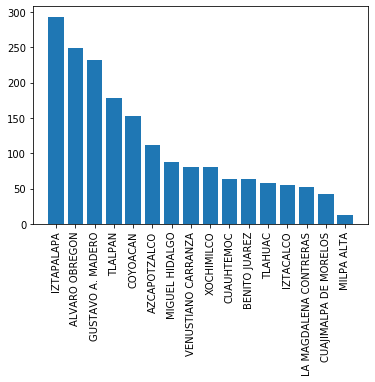

In [29]:
plt.bar(df['ALCALDIA'].value_counts().index, df['ALCALDIA'].value_counts().values)
plt.xticks(rotation=90)
plt.show()